In [30]:
import abm_py as abm
import matplotlib.pyplot as plt
import numpy as np
import utility

MHZ = 1.51982850071586e-10
GHZ = 1.51982850071586e-7
CMINV = 4.5563352812e-6

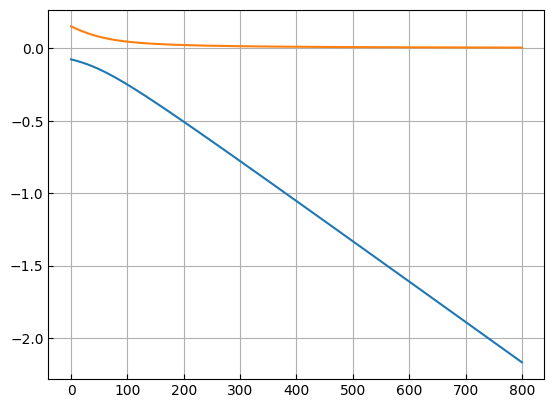

In [51]:
li = abm.HifiProblemBuilder(1, 2)
li.with_hyperfine_coupling(228.2 / 1.5 * MHZ)
li2 = abm.DoubleHifiProblemBuilder.new_homo(li, symmetry = "fermionic")
li2.with_projection(-4)

mag_fields = np.linspace(0, 800, 500)
states = np.array(li2.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states);

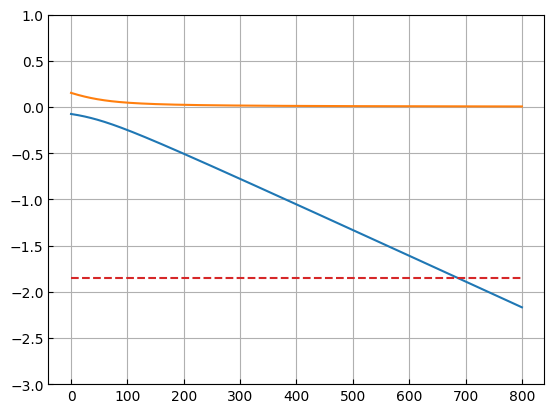

In [52]:
abm_li2 = abm.ABMProblemBuilder.new_homo(li, symmetry = "fermionic")
abm_li2.with_projection(-4)
abm_li2.with_vibrational([-1.856197 * GHZ], [-24.026554 * GHZ], [0.377814548])

mag_fields = np.linspace(0, 800, 500)
abm_states = np.array(abm_li2.build().states_range(mag_fields)) / GHZ

fig, ax = utility.plot()
ax.plot(mag_fields, states)
ax.plot(mag_fields, abm_states, linestyle="--")
ax.set_ylim(-3, 1);

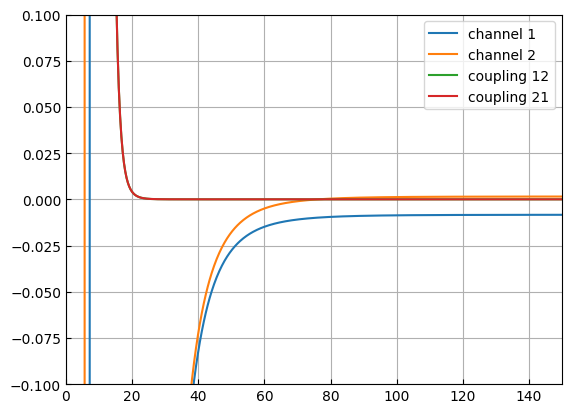

In [53]:
data = utility.load("li2_potentials.dat")

fig, ax = utility.plot()
ax.plot(data[:, 0], data[:, 1:] / CMINV)
ax.set_xlim(0, 150)
ax.set_ylim(-0.1, 0.1)
ax.legend(["channel 1", "channel 2", "coupling 12", "coupling 21"]);

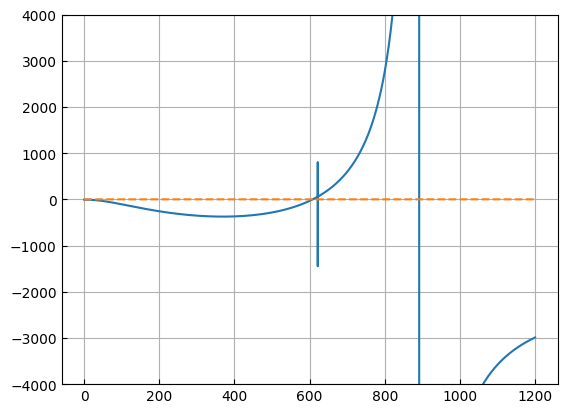

In [59]:
# comparing result https://arxiv.org/pdf/1404.2623 
data = utility.load("li2_scatterings.dat")

fig, ax = utility.plot()
ax.plot(data[:, 0], data[:, 1])
ax.plot(data[:, 0], data[:, 2], linestyle="--")
ax.set_ylim(-4000, 4000);
# ax.set_xlim(600, 650);